In [81]:
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
import random
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [26]:
df=pd.read_csv('https://raw.githubusercontent.com/tomikola/projects/main/smoke_detection_project/smoke_detection_iot.csv')


In [27]:
df.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [28]:
df.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [30]:
df.drop(columns=['Unnamed: 0','UTC','CNT'],inplace=True)
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [37]:
X,y=df.iloc[:,:-1],df[df.columns[-1]]

In [38]:
X.shape,y.shape

((62630, 12), (62630,))

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)

In [41]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((46972, 12), (46972,), (15658, 12), (15658,))

In [42]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train_scaled=pd.DataFrame(scale.fit_transform(X_train),columns=X_train.columns)
X_train_scaled

In [45]:
for col in X_train_scaled.columns:
    print(col,X_train_scaled[col].min(),X_train_scaled[col].max())

Temperature[C] 0.0 1.0
Humidity[%] 0.0 0.9999999999999999
TVOC[ppb] 0.0 1.0
eCO2[ppm] 0.0 0.9999999999999999
Raw H2 0.0 1.0
Raw Ethanol 0.0 1.0
Pressure[hPa] 0.0 1.0
PM1.0 0.0 1.0
PM2.5 0.0 1.0
NC0.5 0.0 1.0
NC1.0 0.0 1.0
NC2.5 0.0 0.9999999999999999


In [47]:
X_test_scaled = pd.DataFrame(scale.fit_transform(X_test),columns=X_test.columns)
for col in X_test_scaled.columns:
    print(col,X_test_scaled[col].min(),X_test_scaled[col].max())

Temperature[C] 0.0 1.0
Humidity[%] 0.0 1.0
TVOC[ppb] 0.0 1.0
eCO2[ppm] 0.0 1.0
Raw H2 0.0 0.9999999999999996
Raw Ethanol 0.0 1.0
Pressure[hPa] 0.0 1.0
PM1.0 0.0 1.0
PM2.5 0.0 0.9999999999999999
NC0.5 0.0 1.0
NC1.0 0.0 0.9999999999999999
NC2.5 0.0 1.0


In [48]:
from sklearn import svm
model = svm.SVC()

In [49]:
model.fit(X_train_scaled, y_train)

SVC()

In [51]:
from sklearn.metrics import mean_absolute_error

In [52]:
predictions = model.predict(X_test_scaled)
mae = mean_absolute_error(predictions, y_test)
print("Mean Absolute Error with Support Vector Machine: {:.4f}".format(mae))

Mean Absolute Error with Support Vector Machine: 0.0895


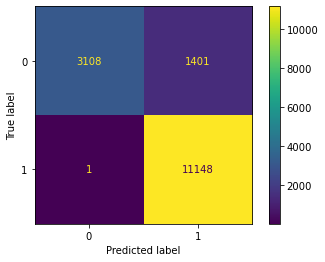

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

In [60]:
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, predictions)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      0.69      0.82      4509
           1       0.89      1.00      0.94     11149

    accuracy                           0.91     15658
   macro avg       0.94      0.84      0.88     15658
weighted avg       0.92      0.91      0.90     15658



In [61]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [63]:
model2=RFC(n_estimators = 100)

In [64]:
model2.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [66]:
predictions2 = model2.predict(X_test_scaled)
mae2 = mean_absolute_error(predictions2, y_test)
print("Mean Absolute Error with RandomForest Classifier: {:.4f}".format(mae2))

Mean Absolute Error with Support Vector Machine: 0.0003


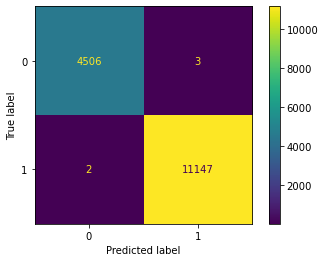

In [67]:
cm2 = confusion_matrix(y_test, predictions2, labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=model.classes_)
disp.plot()

In [68]:
clf_report2 = classification_report(y_test, predictions2)
print(clf_report2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4509
           1       1.00      1.00      1.00     11149

    accuracy                           1.00     15658
   macro avg       1.00      1.00      1.00     15658
weighted avg       1.00      1.00      1.00     15658



In [69]:
from sklearn.neural_network import MLPClassifier

In [70]:
model3=MLPClassifier(solver='lbfgs',
                     alpha=1e-5,
                     hidden_layer_sizes=(5, 2,5),
                     random_state=1)
model3.fit(X_train_scaled, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2, 5), random_state=1,
              solver='lbfgs')

In [71]:
predictions3 = model3.predict(X_test_scaled)
mae3 = mean_absolute_error(predictions3, y_test)
print("Mean Absolute Error with MLP Classifier(: {:.4f}".format(mae3))

Mean Absolute Error with Support Vector Machine: 0.1155


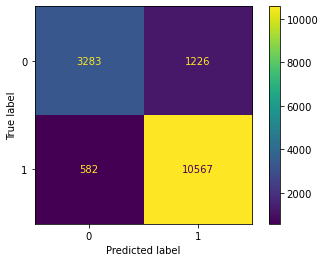

In [88]:
cm3 = confusion_matrix(y_test, predictions3, labels=model3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,
                              display_labels=model.classes_)
disp.plot()

In [73]:
clf_report3 = classification_report(y_test, predictions3)
print(clf_report3)

              precision    recall  f1-score   support

           0       0.85      0.73      0.78      4509
           1       0.90      0.95      0.92     11149

    accuracy                           0.88     15658
   macro avg       0.87      0.84      0.85     15658
weighted avg       0.88      0.88      0.88     15658



In [74]:
predictions3

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [86]:
prediction_df=pd.DataFrame({'SVC prediction':predictions,'RandomTree prediction':predictions2,'MPL prediction':predictions3})
prediction_df['prediction4']=prediction_df.sum(axis=1)
prediction_df.prediction4=np.where(prediction_df.prediction4>=2,1,0)
predictions4=prediction_df.prediction4

In [93]:
mae4 = mean_absolute_error(predictions4, y_test)
print("Mean Absolute Error with decision of 3 others models: {:.4f}".format(mae4))

Mean Absolute Error with decision of 3 others models: 0.0574


In [89]:
clf_report4 = classification_report(y_test, predictions4)
print(clf_report4)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      4509
           1       0.93      1.00      0.96     11149

    accuracy                           0.94     15658
   macro avg       0.96      0.90      0.93     15658
weighted avg       0.95      0.94      0.94     15658



Summary

In [95]:
print("Mean Absolute Error with Support Vector Machine: {:.4f}".format(mae))
print("Mean Absolute Error with RandomForest Classifier: {:.4f}".format(mae2))
print("Mean Absolute Error with MLP Classifier: {:.4f}".format(mae3))
print("Mean Absolute Error with of 3 others models: {:.4f}".format(mae4))

Mean Absolute Error with Support Vector Machine: 0.0003
Mean Absolute Error with RandomForest Classifier: 0.0003
Mean Absolute Error with MLP Classifier: 0.1155
Mean Absolute Error with of 3 others models: 0.0574


In [96]:
mae-mae2

0.0